In [1]:
#Import Library
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
#Import file
df = pd.read_csv("../content/traffic_result.csv")

In [3]:
#Show the DataFrame
df

,Day,detector_id,lane,speed,occupancy,volume
0,1,AID01101,Fast Lane,76,9,12
1,1,AID01102,Middle Lane,70,6,6
2,1,AID01102,Fast Lane,69,7,8
3,1,AID01102,Middle Lane,71,5,7
4,1,AID01102,Slow Lane,53,5,5
...,...,...,...,...,...,...
2593,29,AID01207,Middle Lane,43,6,8
2594,29,AID01207,Middle Lane,62,6,10
2595,29,AID01207,Slow Lane,45,3,3
2596,29,AID01208,Fast Lane,67,5,7


In [4]:
#Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          2598 non-null   int64 
 1   detector_id  2598 non-null   object
 2   lane         2598 non-null   object
 3   speed        2598 non-null   int64 
 4   occupancy    2598 non-null   int64 
 5   volume       2598 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 121.9+ KB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

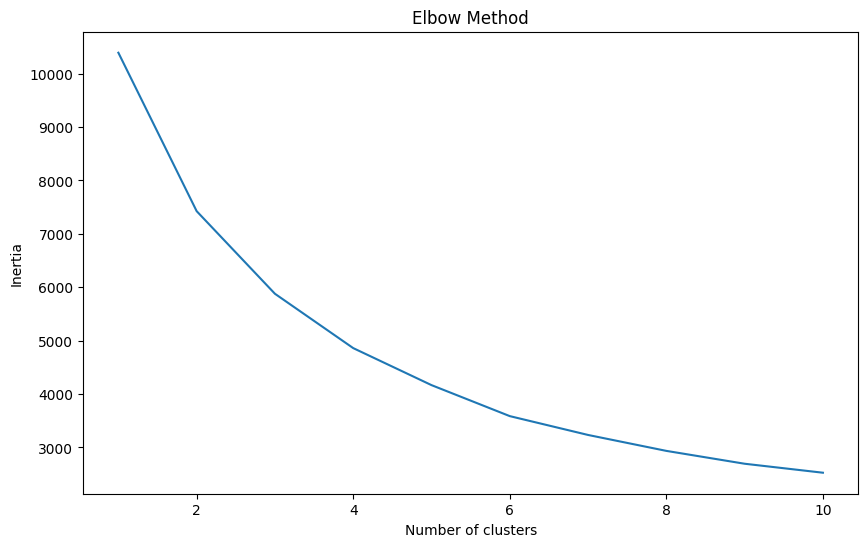

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


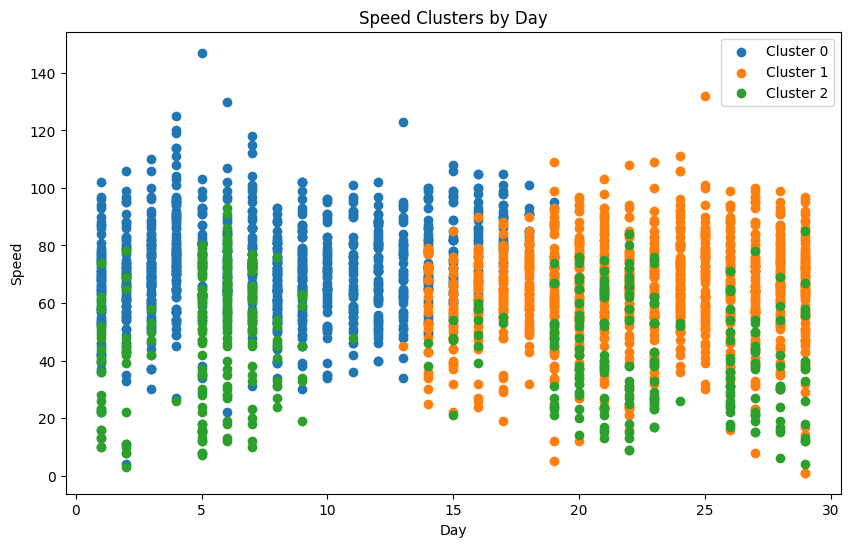

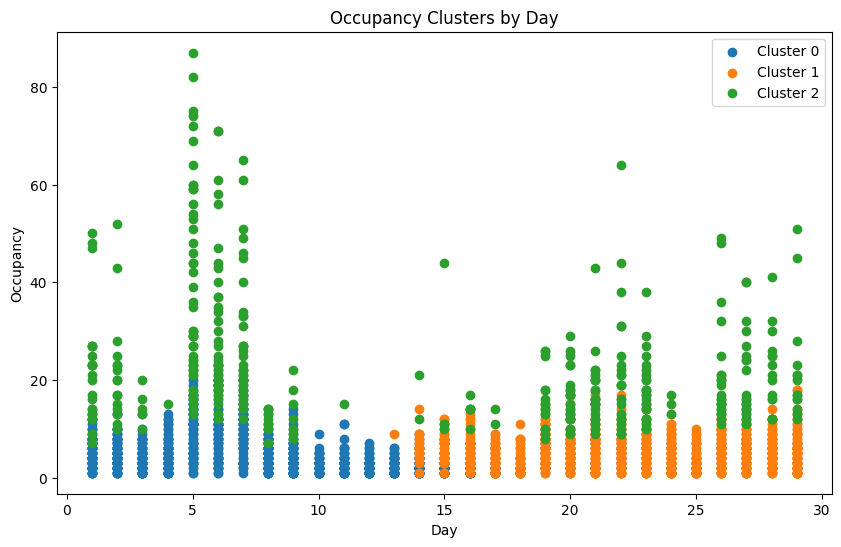

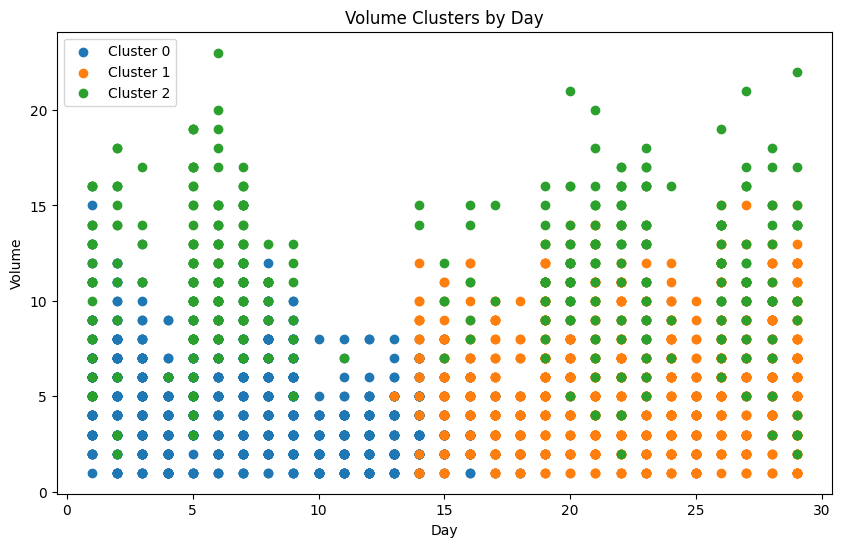

Silhouette Score: 0.26


In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Day', 'speed', 'occupancy', 'volume']])

# Use the Elbow method to find the number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Number of clusters (k) based on the elbow plot
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
df['cluster'] = kmeans.fit_predict(df_scaled)

#Speed
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['Day'], cluster_data['speed'], label=f'Cluster {cluster}')
plt.title('Speed Clusters by Day')
plt.xlabel('Day')
plt.ylabel('Speed')
plt.legend()
plt.show()

# Occupancy
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['Day'], cluster_data['occupancy'], label=f'Cluster {cluster}')
plt.title('Occupancy Clusters by Day')
plt.xlabel('Day')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

# Volume
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['Day'], cluster_data['volume'], label=f'Cluster {cluster}')
plt.title('Volume Clusters by Day')
plt.xlabel('Day')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Evaluate the Silhouette score
silhouette_avg = silhouette_score(df_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')